# Machine learning: classification. Template by
Simon Denman (s.denman@qut.edu.au)

# Project complete by:
Mohan Hao (imhaom@gmail.com)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 2. It simply implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

The template also provides other suggestions around how to approach the problem.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [1]:
# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# seaborn, because of excellent heatmaps
import seaborn as sns;
# stats models is a package that is going to perform the regression analysis
import statsmodels
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
# can also use sklearn for our regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


In [2]:
# load data
train = pd.read_csv('validation.csv')
val = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

# pull out X and y data, convert to numpy
X_train = train.iloc[:,1:].to_numpy()
Y_train = train.iloc[:,0].to_numpy()
X_val = val.iloc[:,1:].to_numpy()
Y_val = val.iloc[:,0].to_numpy()
X_test = test.iloc[:,1:].to_numpy()
Y_test = test.iloc[:,0].to_numpy()

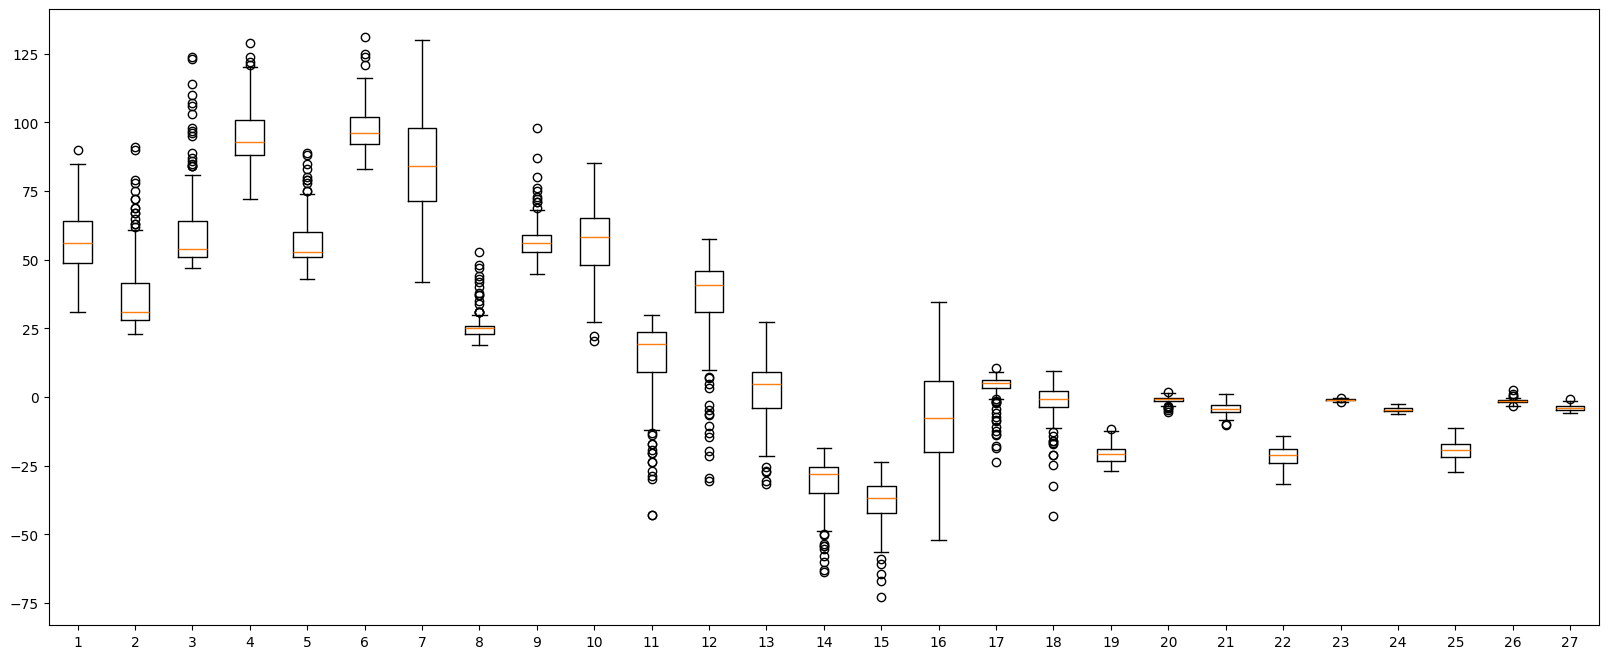

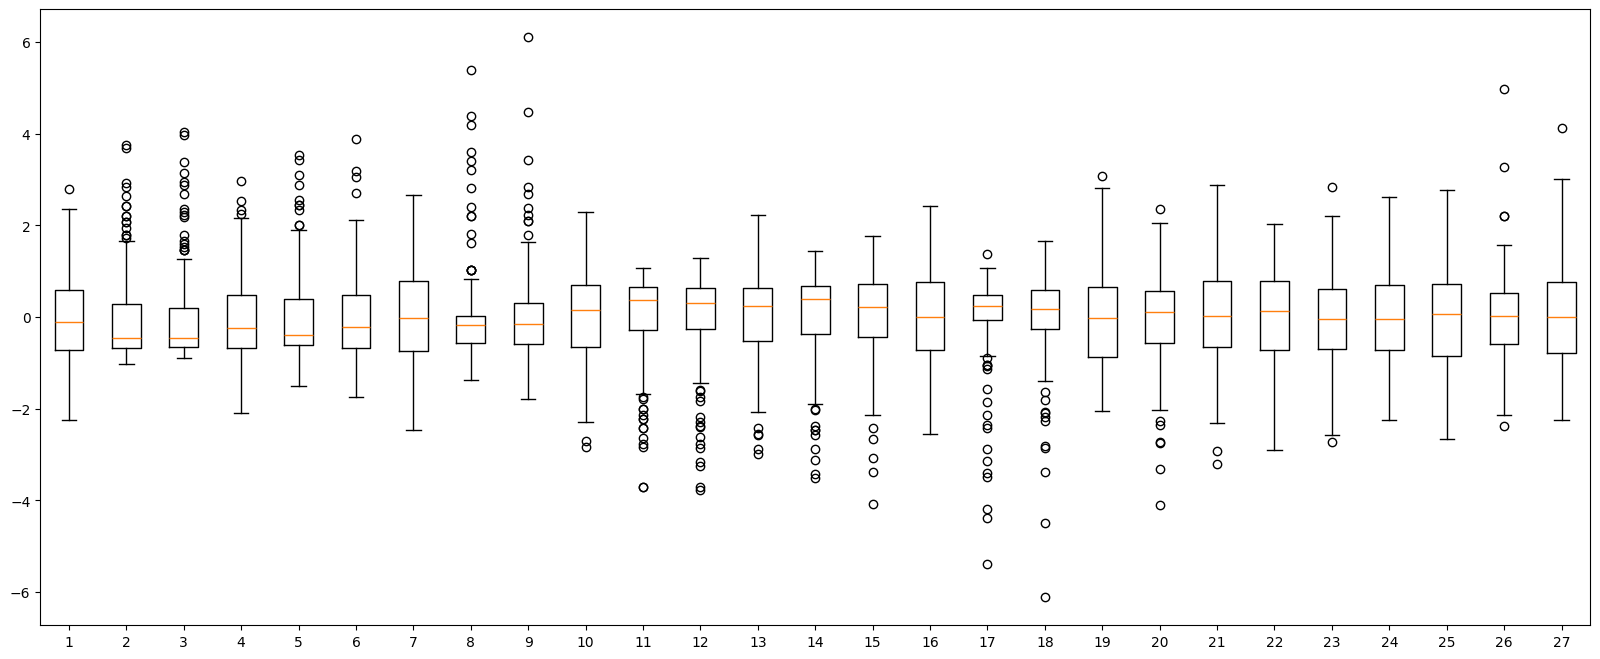

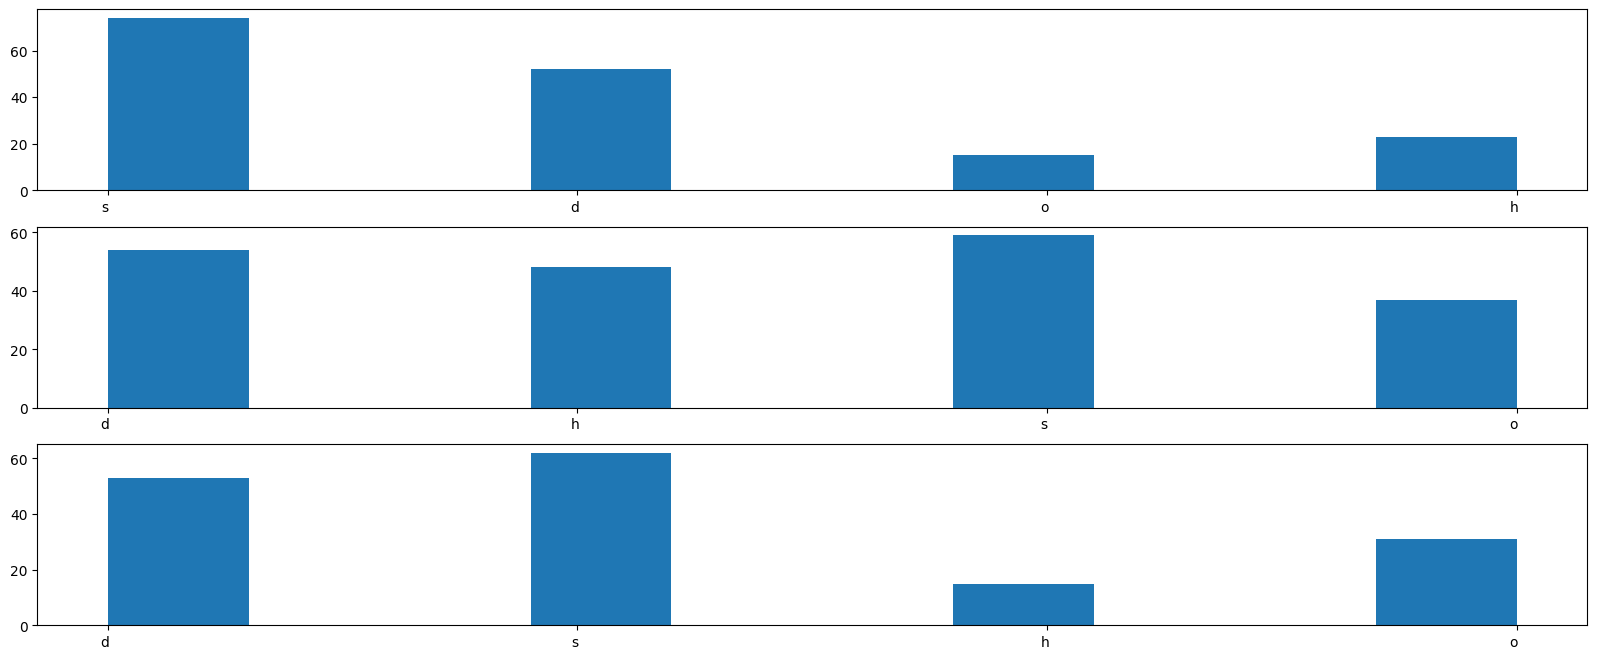

In [3]:
# If you wish to pre-process the data, do so here. In your write-up, outline why you choose to do, or choose not to do, any
# pre-processing
from sklearn.discriminant_analysis import StandardScaler


fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train);

X_scaler = StandardScaler().fit(X_train)
X_train_std = X_scaler.transform(X_train)
X_val_std = X_scaler.transform(X_val)
X_test_std = X_scaler.transform(X_test)

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train_std)

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(3, 1, 1)
ax.hist(Y_train)
ax = fig.add_subplot(3, 1, 2)
ax.hist(Y_val)
ax = fig.add_subplot(3, 1, 3)
ax.hist(Y_test)

plt.show()


In [4]:

# Q2 asks you to use a grid search for each model. You are to evaluate the models on the validation set, and train on the test
# set. If you wish to use sklearn's GridSearchCV, you will need to setup a PredefinedSplit to pass into this. An appropraite
# PredefinedSplit object is created below.
X_train_and_val = numpy.vstack((X_train, X_val))
Y_train_and_val = numpy.hstack((Y_train, Y_val))
mask = numpy.zeros(len(Y_train_and_val))
mask[0:len(Y_train)] = -1
train_val_split = PredefinedSplit(mask)

def eval_model(model, X_train_std, Y_train, X_test_std, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train_std, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train_std) == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test_std, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test_std) == Y_test)/len(Y_test)));
    print(classification_report(Y_test, model.predict(X_test_std)))



              precision    recall  f1-score   support

          d        0.69      0.66      0.67        53
          h        0.70      0.93      0.80        15
          o        1.00      0.48      0.65        31
          s        0.75      0.90      0.82        62

    accuracy                           0.75       161
   macro avg       0.78      0.75      0.74       161
weighted avg       0.77      0.75      0.74       161



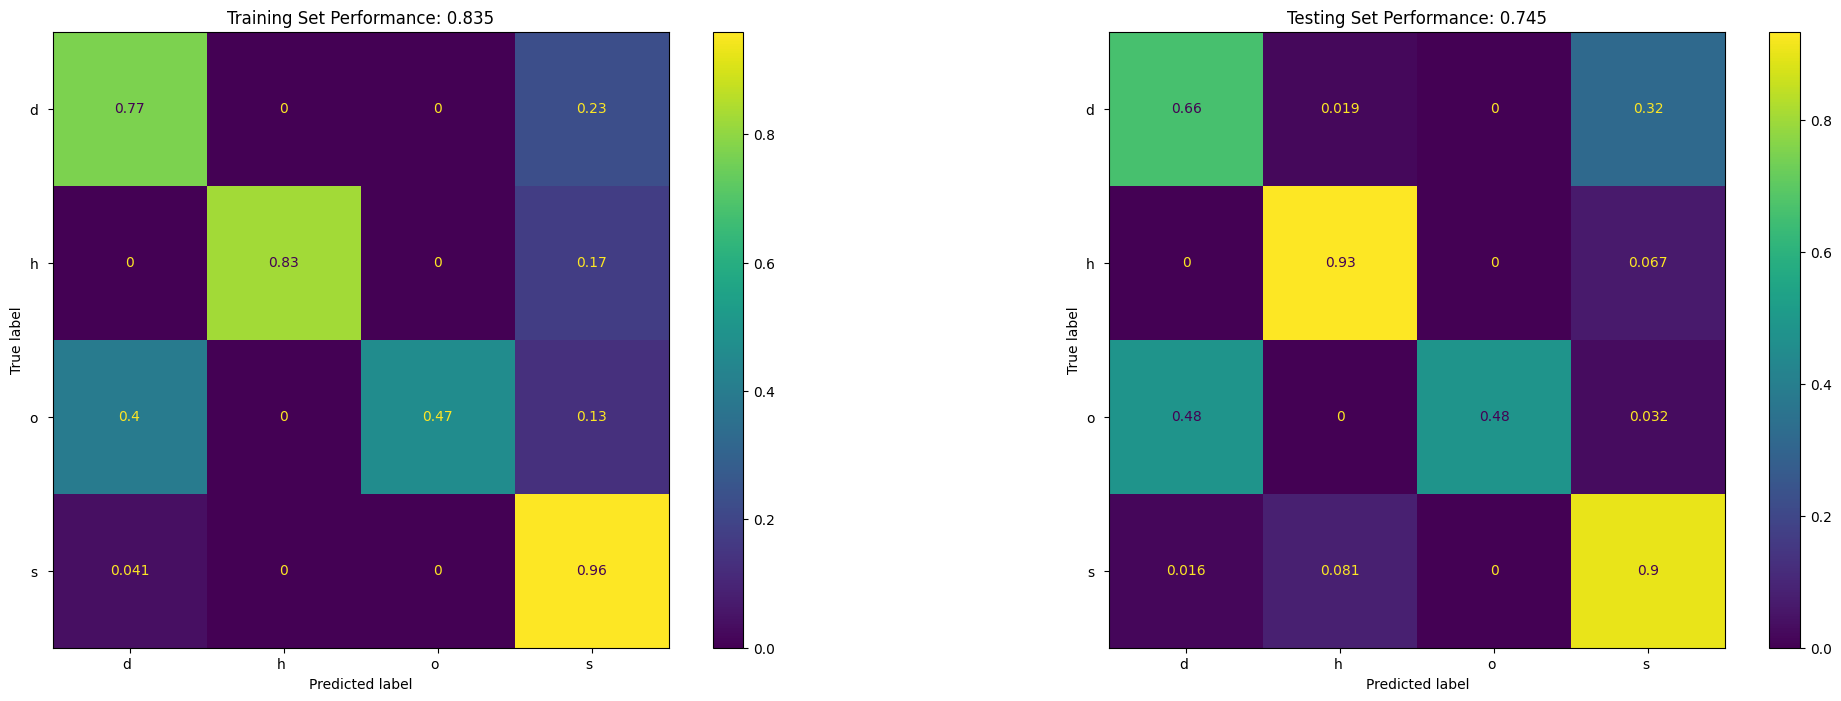

In [5]:
# Train your CKNN. You should consider the following parameters at least:
#  - K
#  - Distance Metric
#  - Weighting Scheme
cknn = KNeighborsClassifier(n_neighbors=11).fit(X_train_std, Y_train)
eval_model(cknn, X_train_std, Y_train, X_test_std, Y_test)



In [6]:
#n_neighbours = [1, 3, 5, 7, 9, 11, 13, 15]
weights = ['uniform', 'distance']
metrics = ['cityblock', 'euclidean']

results = []
best_acc = 0
best_model = None

for k in range(1, 25):
    for w in weights:
        for m in metrics:
            cknn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m).fit(X_train_std, Y_train)
            acc = sum(cknn.predict(X_val_std) == Y_val)/len(Y_val)
            if (acc > best_acc):
                best_acc = acc
                best_model = cknn
            results.append({'k': k, 'weight': w, 'metric': m, 'acc': acc})
           #results.append([k, w, m, acc])

{'k': 1, 'weight': 'uniform', 'metric': 'cityblock', 'acc': 0.8383838383838383}
{'k': 1, 'weight': 'uniform', 'metric': 'euclidean', 'acc': 0.8131313131313131}
{'k': 1, 'weight': 'distance', 'metric': 'cityblock', 'acc': 0.8383838383838383}
{'k': 1, 'weight': 'distance', 'metric': 'euclidean', 'acc': 0.8131313131313131}
{'k': 2, 'weight': 'uniform', 'metric': 'cityblock', 'acc': 0.8282828282828283}
{'k': 2, 'weight': 'uniform', 'metric': 'euclidean', 'acc': 0.7777777777777778}
{'k': 2, 'weight': 'distance', 'metric': 'cityblock', 'acc': 0.8383838383838383}
{'k': 2, 'weight': 'distance', 'metric': 'euclidean', 'acc': 0.8131313131313131}
{'k': 3, 'weight': 'uniform', 'metric': 'cityblock', 'acc': 0.8484848484848485}
{'k': 3, 'weight': 'uniform', 'metric': 'euclidean', 'acc': 0.8181818181818182}
{'k': 3, 'weight': 'distance', 'metric': 'cityblock', 'acc': 0.8585858585858586}
{'k': 3, 'weight': 'distance', 'metric': 'euclidean', 'acc': 0.8282828282828283}
{'k': 4, 'weight': 'uniform', 'met

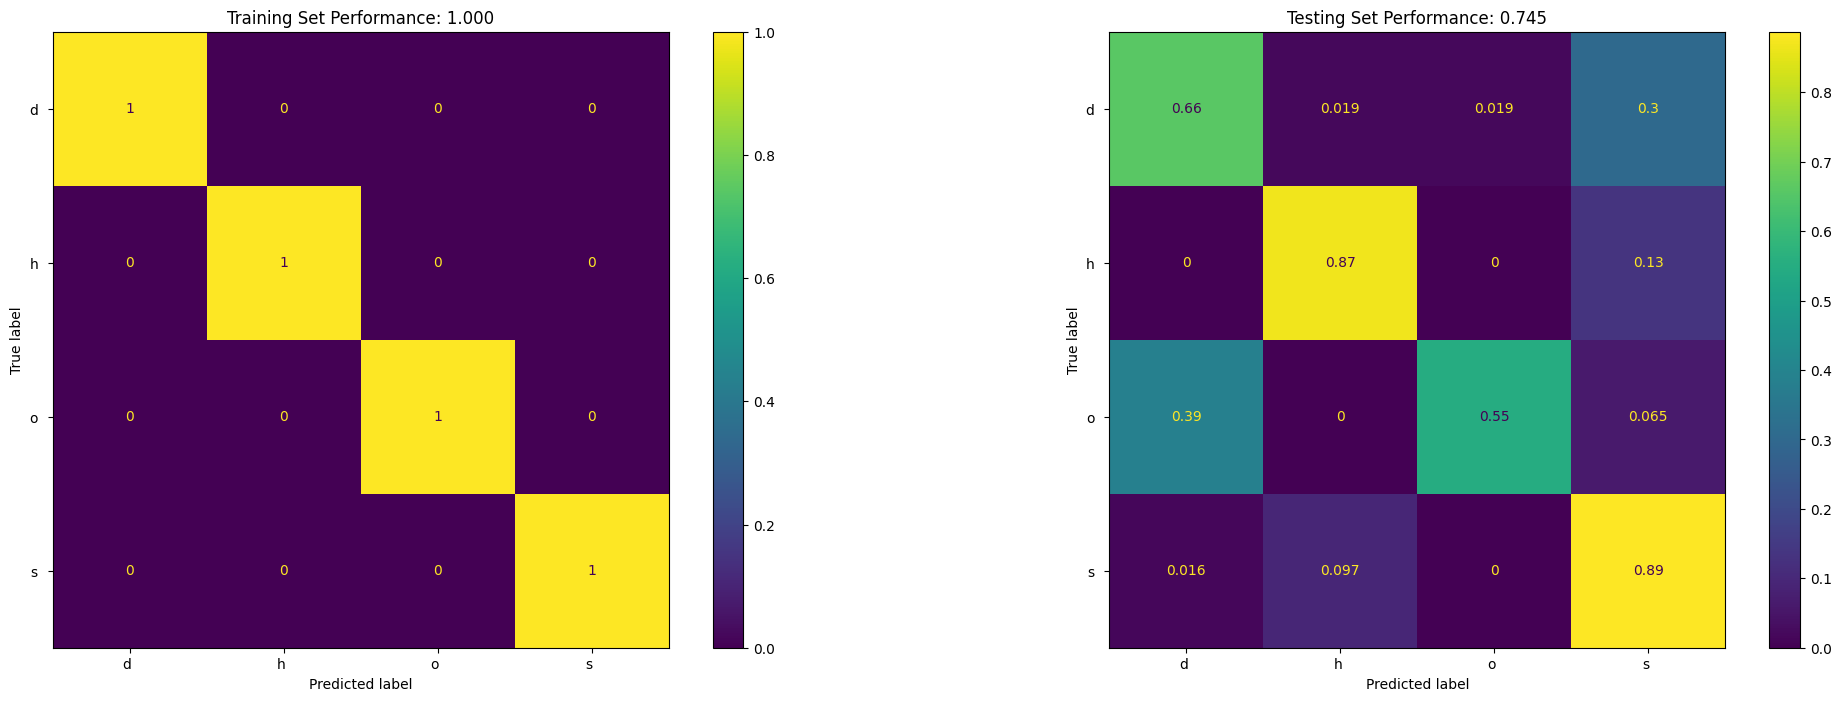

In [7]:
for r in results:
    print(r)

eval_model(best_model, X_train_std, Y_train, X_test_std, Y_test)

              precision    recall  f1-score   support

          d        0.76      0.74      0.75        53
          h        0.72      0.87      0.79        15
          o        0.95      0.61      0.75        31
          s        0.79      0.92      0.85        62

    accuracy                           0.80       161
   macro avg       0.81      0.78      0.78       161
weighted avg       0.81      0.80      0.79       161



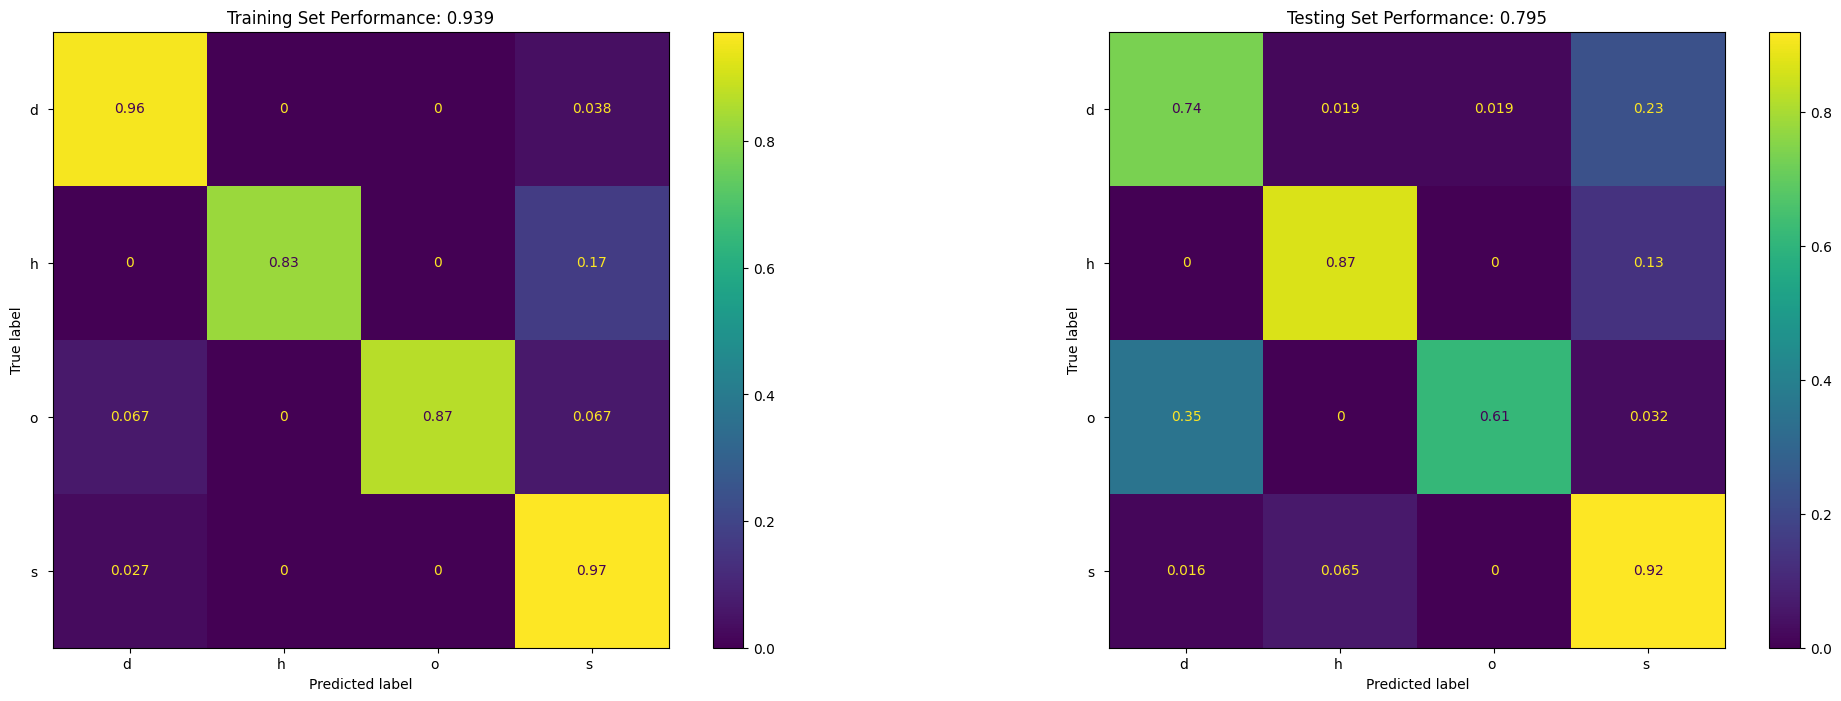

In [8]:
# Train your SVM. You should consider the following parameters at least:
#  - C
#  - Kernel Type
#  - Kernel Parameters

from sklearn.svm import SVC


svm = SVC(kernel = "rbf", C=1, degree = 3).fit(X_train_std, Y_train)
eval_model(svm, X_train_std, Y_train, X_test_std, Y_test)

In [9]:
C = [1e-5, 1e-3, 1e-1, 1, 1e3, 1e5]
degree = [3, 4, 5, 6, 7, 8, 9]
#scale = [1e-5, 1e-3, 1e-1, 1, 1e3, 1e5]
scale = ['auto', 'scale']
class_weight = ['balanced', None]

results = []
best_acc = 0
best_model = None

for c in C:
    for s in scale:
        for turnip in class_weight:
            svm = OneVsRestClassifier(SVC(kernel='linear', class_weight = turnip, gamma = s, C=c)).fit(X_train_std, Y_train)
            acc = f1_score(Y_val, svm.predict(X_val_std), average='macro')
            if (acc > best_acc):
                best_acc = acc
                best_model = svm
            results.append({'C': c, 'kenel':'linear', 'scale': scale, 'class_weight': turnip, 'evs':'1vALL', 'F1': acc})

            svm = OneVsOneClassifier(SVC(kernel='linear', class_weight = turnip, gamma = s, C=c)).fit(X_train_std, Y_train)
            acc = f1_score(Y_val, svm.predict(X_val_std), average='macro')
            if (acc > best_acc):
                best_acc = acc
                best_model = svm
            results.append({'C': c, 'kenel':'linear', 'scale': s, 'class_weight': turnip, 'evs':'1v1', 'F1': acc})


{'C': 0.1, 'kenel': 'linear', 'scale': ['auto', 'scale'], 'class_weight': 'balanced', 'evs': '1vALL', 'F1': 0.9092911797107002}
{'C': 0.1, 'kenel': 'linear', 'scale': ['auto', 'scale'], 'class_weight': 'balanced', 'evs': '1vALL', 'F1': 0.9092911797107002}
              precision    recall  f1-score   support

          d        0.89      0.62      0.73        53
          h        0.61      0.93      0.74        15
          o        0.77      0.77      0.77        31
          s        0.77      0.87      0.82        62

    accuracy                           0.78       161
   macro avg       0.76      0.80      0.77       161
weighted avg       0.80      0.78      0.77       161



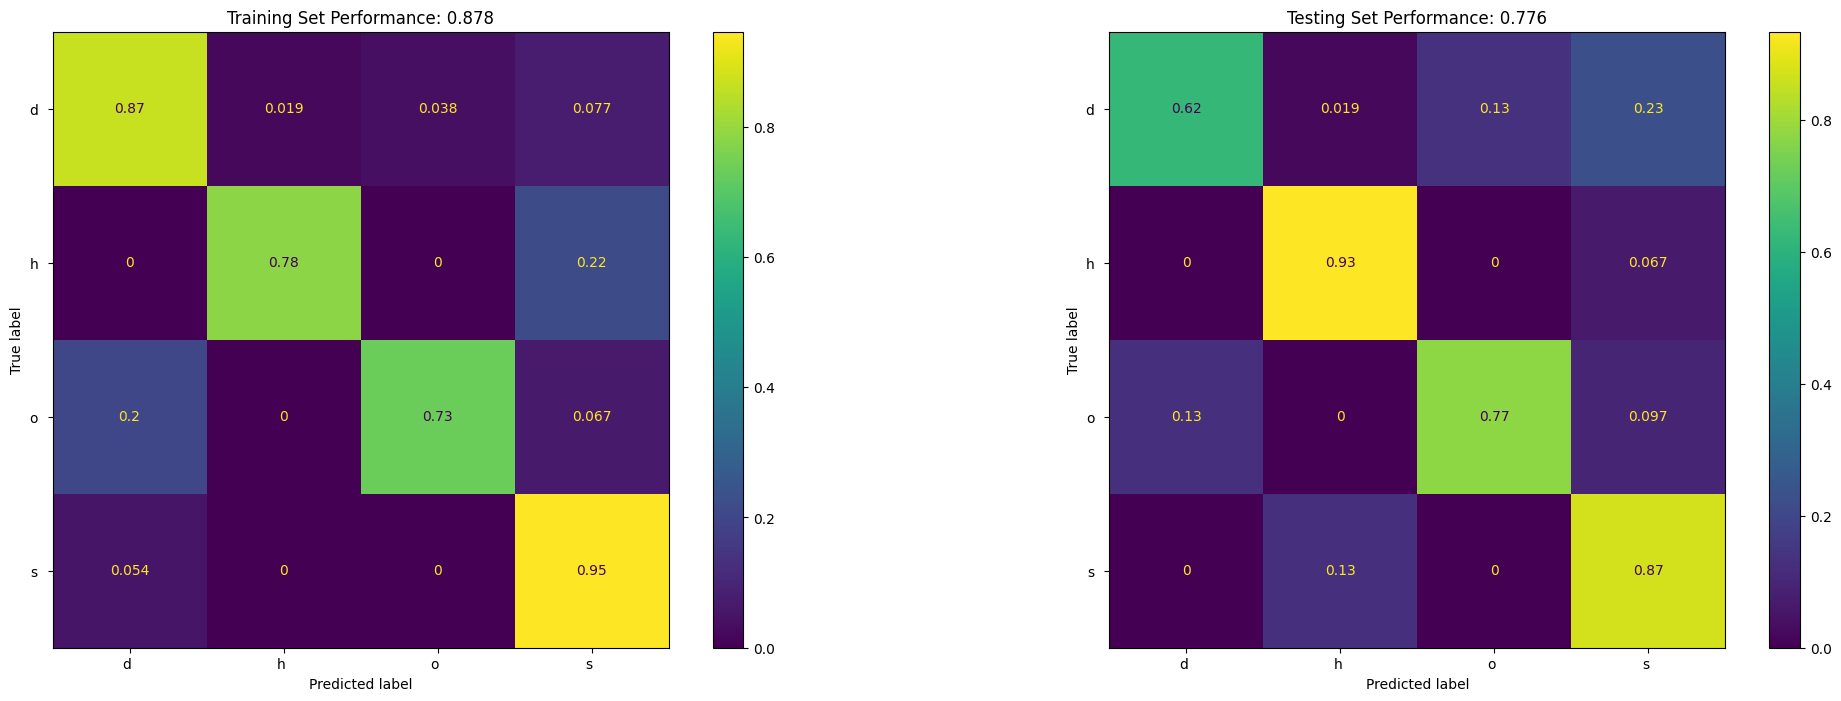

In [10]:
for r in results:
    if (r['F1'] == best_acc):
        print(r)

eval_model(best_model, X_train_std, Y_train, X_test_std, Y_test)

              precision    recall  f1-score   support

          d        0.76      0.79      0.78        53
          h        0.68      0.87      0.76        15
          o        0.95      0.65      0.77        31
          s        0.82      0.87      0.84        62

    accuracy                           0.80       161
   macro avg       0.80      0.79      0.79       161
weighted avg       0.81      0.80      0.80       161



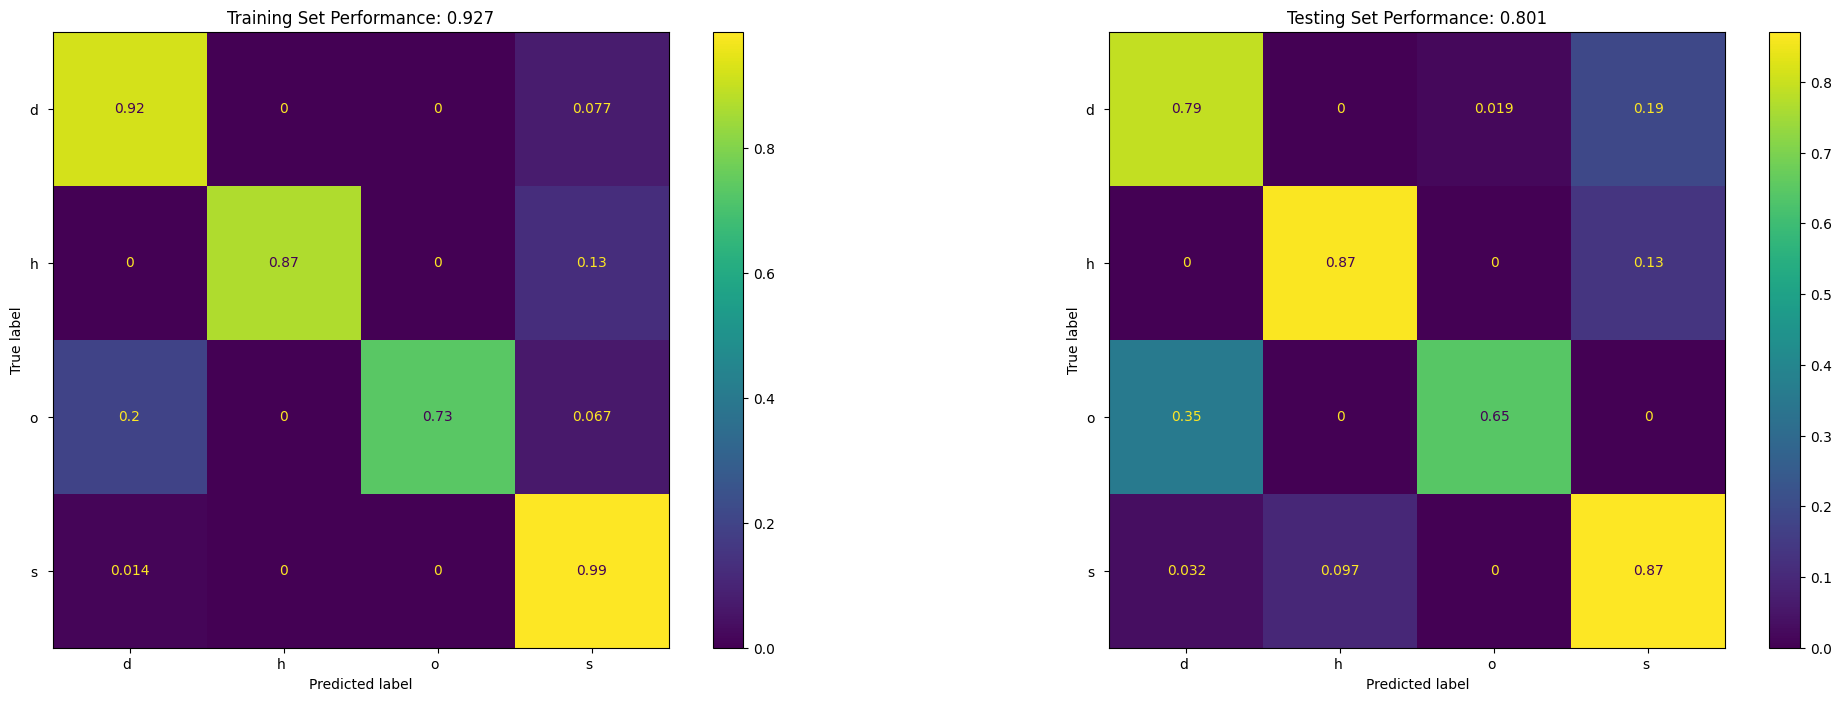

In [11]:
# Train your RF. You should consider the following parameters at least:
#  - Tree depth
#  - Number of estimators


rf = RandomForestClassifier(n_estimators=100, max_depth=4).fit(X_train_std, Y_train)
eval_model(rf, X_train_std, Y_train, X_test_std, Y_test)

In [12]:
n_estimators = [100, 200, 400, 800, 1600]
max_depth = [2, 4, 8, 16, 32]
class_weight = ['balanced', 'balanced_subsample', None]

results = []
best_acc = 0
best_model = None

for n in n_estimators:
    for d in max_depth:
        for turnip in class_weight:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, class_weight=turnip).fit(X_train_std, Y_train)
            acc = f1_score(Y_val, rf.predict(X_val_std), average='macro') # average='weighted'
            if (acc > best_acc):
                best_acc = acc
                best_model = rf
            results.append({'n_estimators': n, 'max_depth': d, 'class_weight': turnip, 'F1': acc})

{'n_estimators': 100, 'max_depth': 2, 'class_weight': 'balanced_subsample', 'F1': 0.9540294246815986}
              precision    recall  f1-score   support

          d        0.81      0.79      0.80        53
          h        0.58      0.93      0.72        15
          o        0.96      0.77      0.86        31
          s        0.83      0.81      0.82        62

    accuracy                           0.81       161
   macro avg       0.80      0.83      0.80       161
weighted avg       0.83      0.81      0.81       161



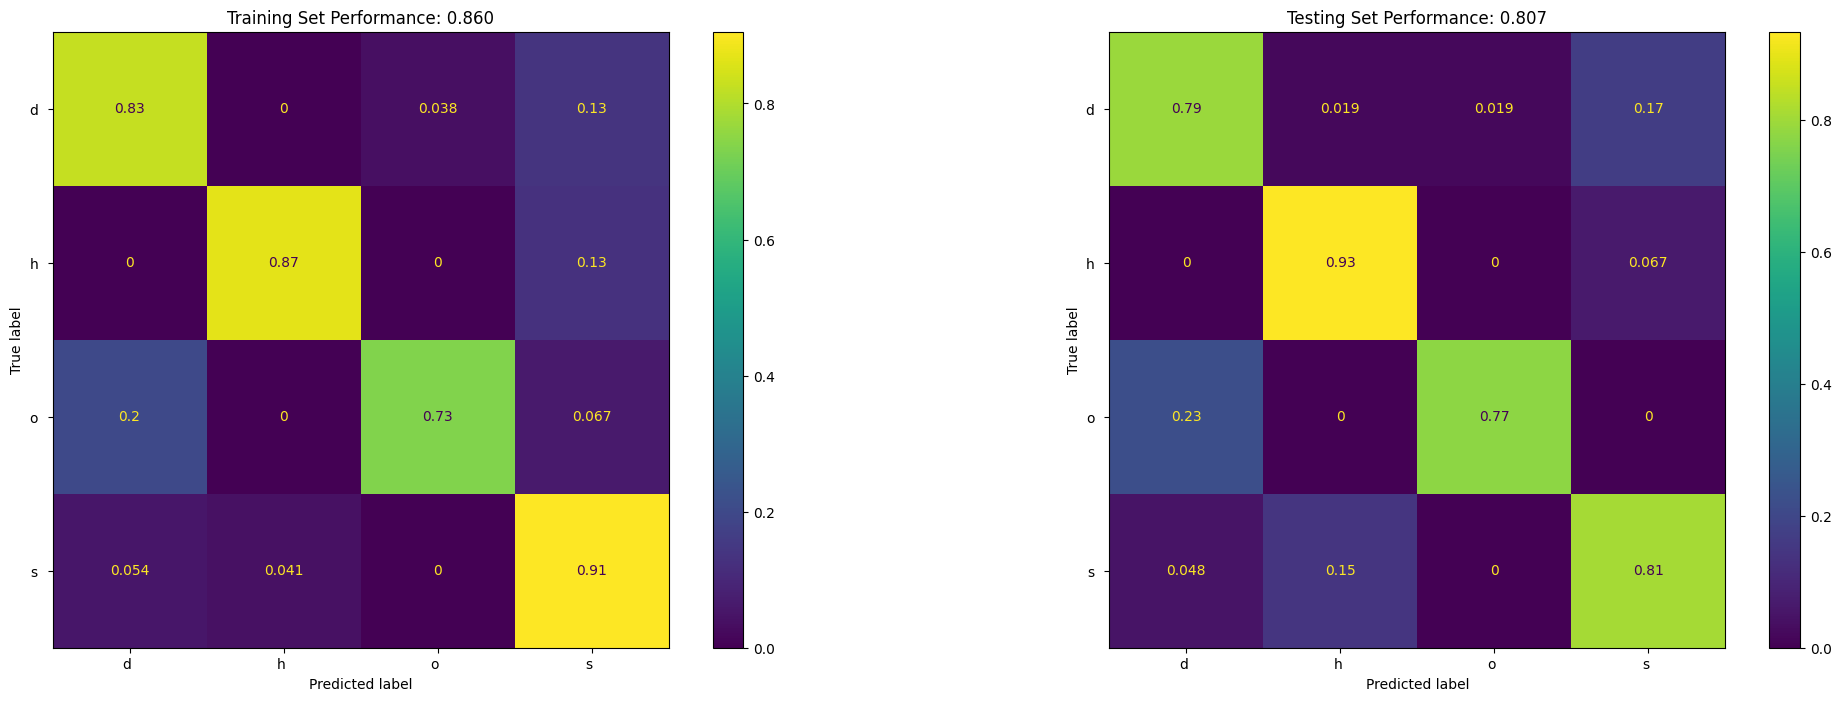

In [13]:
for r in results:
    if r['F1'] == best_acc:
        print(r)

eval_model(best_model, X_train_std, Y_train, X_test_std, Y_test)

In [ ]:
# Evaluate the three methods. This should consider appropriate performance measures for the classifiers, such as F1, and 
# visualisations of performance (i.e. confusion matrices) that demonstrate any difference in perfomance between the models.

In [15]:
# For your write-up, you should include:
# - a discussion of any pre-processing you did and why; or why you left the data as-is
# - a discussion of how you selected the hyper-parameters for each of your models, and how these may be influenced by any data 
#   characteristics, and any effect you may see from the selected hyper-parameters (ie. if you have found a small value for a 
#   hyper parameter, what effect will this have on the model compared to a large value?) 
# - an evaluation and comparison of three models, which should highlight any differences observed between the models
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT